In [1]:
import matplotlib.pyplot as plt                  
import pandas as pd
import numpy as np

In [2]:
# map source, 'Colin' or 'websky'
map_source = 'Colin'
# ksz type, 'lt' or 'ri'
ksz_type = 'lt'
if ksz_type == 'lt':
    ksz_name = 'late-time'
else:
    ksz_name = 'reionization'
legend = ['Planck_SMICA', 'CMB_S3', 'CMB_S4']

In [3]:
data_path = 'output/'
plot_path = 'output/' 
plot_name =f'{map_source}_{ksz_type}_auto_bias.png'
lmin = 30
lmaxs = [4000]
#lmaxs = [3000, 4000, 4500]
ylim = [-0.06, 0.06]
# experiments = ['CMB_S4']
experiments = ['Planck_SMICA', 'CMB_S3', 'CMB_S4']
row, column = np.size(experiments), np.size(lmaxs)

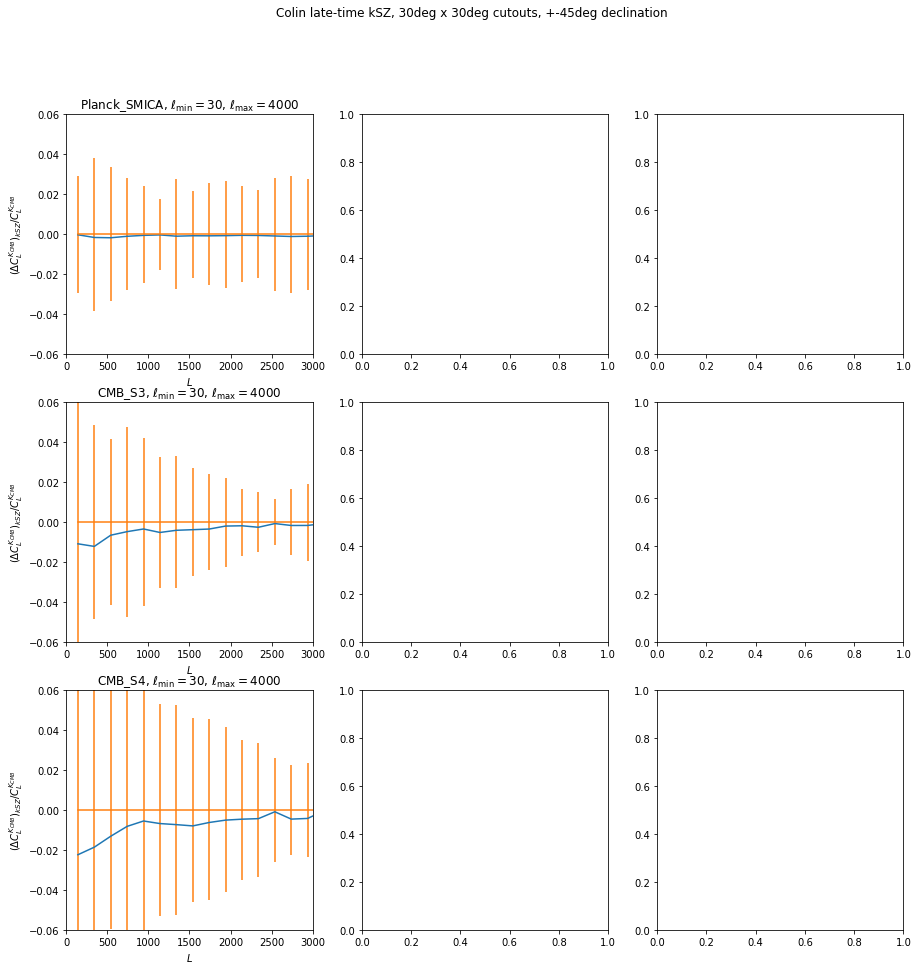

In [4]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('%s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].plot(Data['Ls'], Data['bias'])
        ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['bias_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        ax[i,j].set_xlim([0,3000])
        ax[i,j].set_ylim(ylim)
        plt.savefig(plot_path + plot_name)

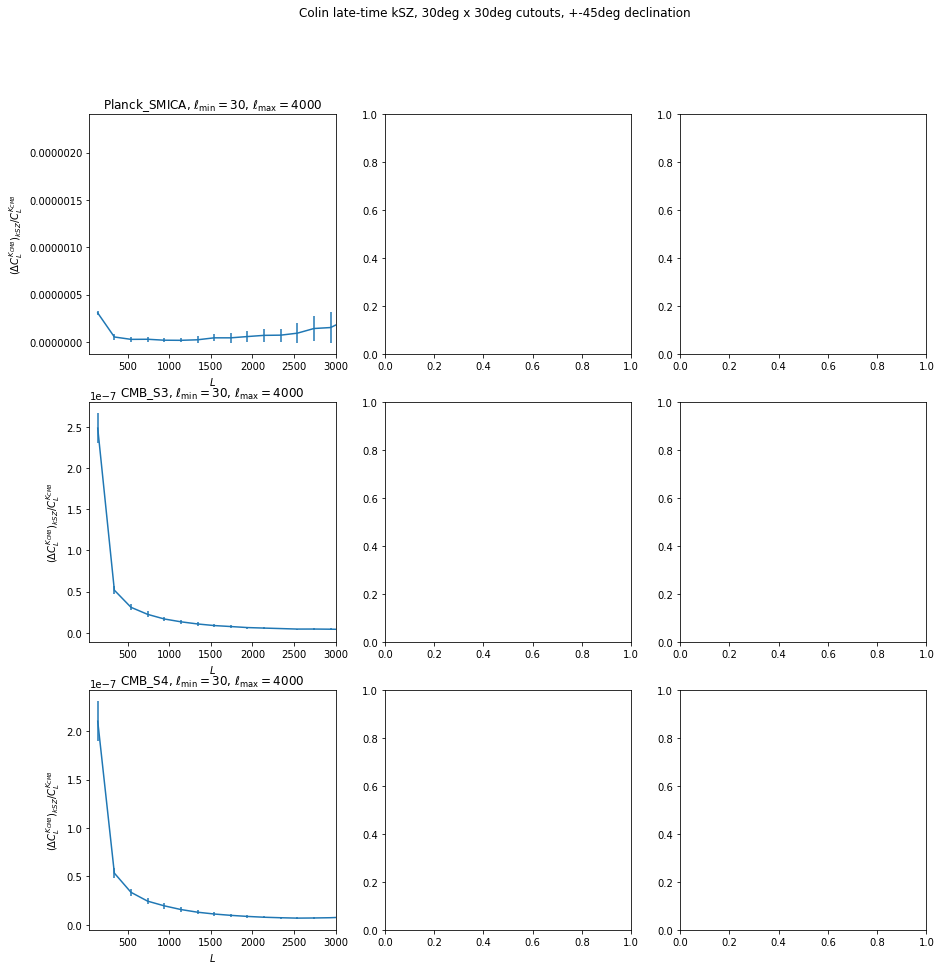

In [5]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('%s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['reckap_x_reckap']-Data['noise'], yerr=Data['reckap_x_reckap_err'])
        # ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{K_{CMB}})_{kSZ}/C_L^{K_{CMB}}$')      
        ax[i,j].set_xlim([40,3000])
        plt.savefig(plot_path + plot_name)

In [6]:
Data_planck = pd.read_csv('output/Colin_lt_Planck_SMICA_30_4000.csv')
Data_cmbs3 = pd.read_csv('output/Colin_lt_CMB_S3_30_4000.csv')
Data_cmbs4 = pd.read_csv('output/Colin_lt_CMB_S4_30_4000.csv')
Ls = Data_planck['Ls']

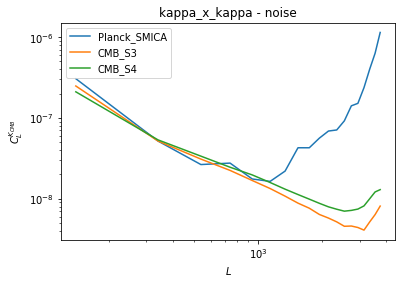

In [7]:
plt.plot(Ls, Data_planck['reckap_x_reckap']-Data_planck['noise'])
plt.plot(Ls, Data_cmbs3['reckap_x_reckap']-Data_cmbs3['noise'])
plt.plot(Ls, Data_cmbs4['reckap_x_reckap']-Data_cmbs4['noise'])
plt.title('kappa_x_kappa - noise')
plt.legend(legend)
plt.xlabel('$L$')                                                                        
plt.ylabel('$C_L^{K_{CMB}}$')      
plt.xscale('log')
plt.yscale('log')

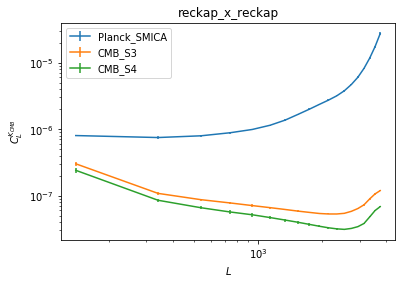

In [8]:
plt.errorbar(Ls, Data_planck['reckap_x_reckap'], yerr=Data_planck['reckap_x_reckap_err'])
plt.errorbar(Ls, Data_cmbs3['reckap_x_reckap'], yerr=Data_cmbs3['reckap_x_reckap_err'])
plt.errorbar(Ls, Data_cmbs4['reckap_x_reckap'], yerr=Data_cmbs4['reckap_x_reckap_err'])
plt.title('reckap_x_reckap')
plt.legend(legend)
plt.xlabel('$L$')                                                                        
plt.ylabel('$C_L^{K_{CMB}}$')      
plt.xscale('log')
plt.yscale('log')

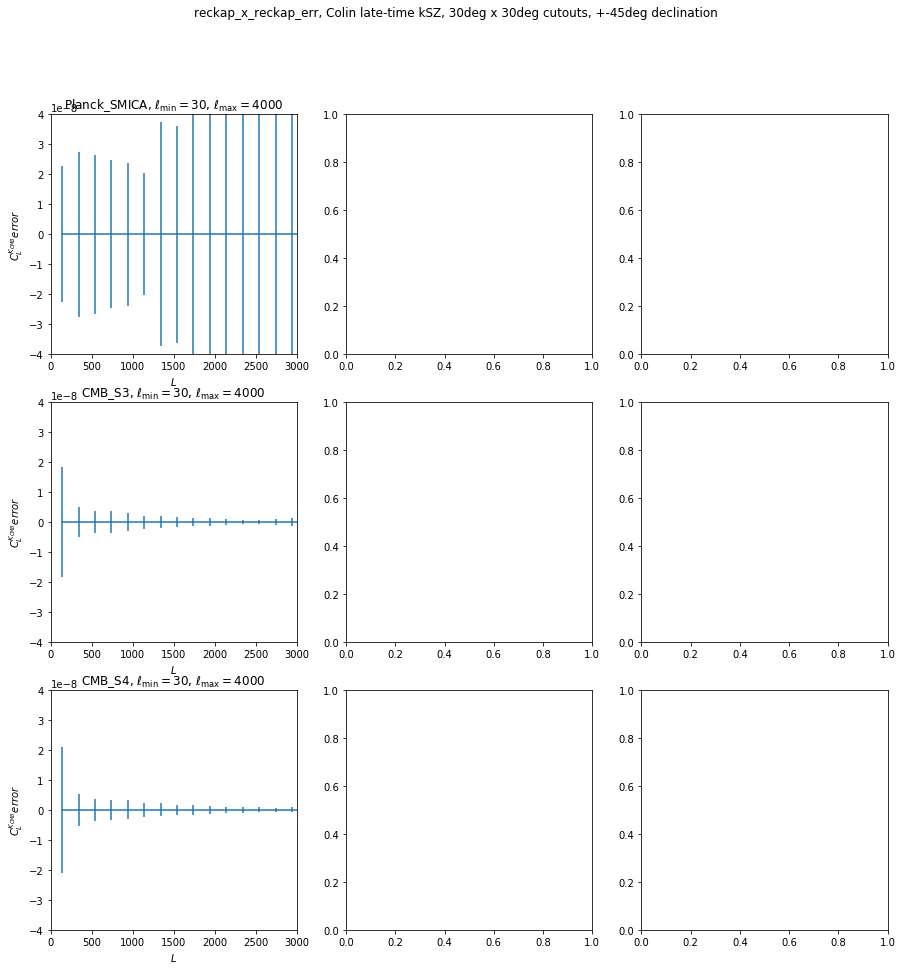

In [13]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('reckap_x_reckap_err, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        # ax[i,j].plot(Data['Ls'], Data['bias'])
        ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$C_L^{K_{CMB}} error$')      
        ax[i,j].set_xlim([0,3000])
        ax[i,j].set_ylim([-4e-8, 4e-8])
        plt.savefig(plot_path + plot_name)

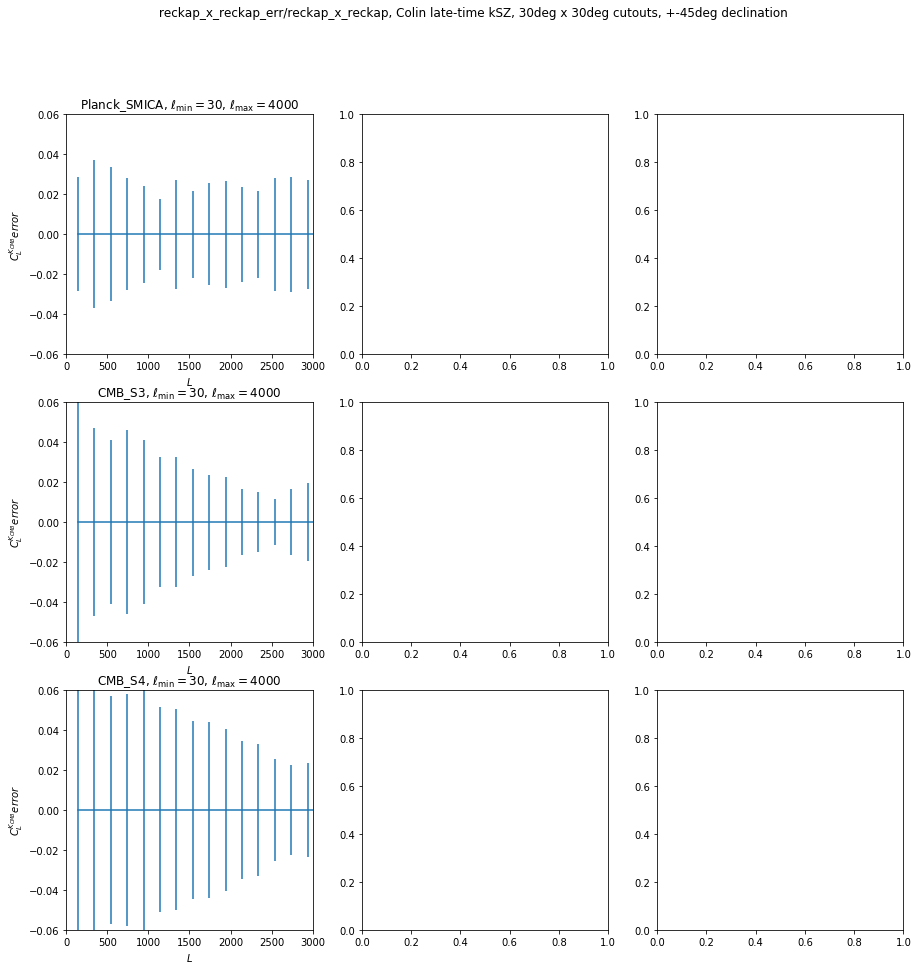

In [14]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle(' reckap_x_reckap_err/reckap_x_reckap, %s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        # ax[i,j].plot(Data['Ls'], Data['bias'])
        ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err']/Data['reckap_x_reckap'])
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$C_L^{K_{CMB}} error$')      
        ax[i,j].set_xlim([0,3000])
        ax[i,j].set_ylim(ylim)
        plt.savefig(plot_path + plot_name)

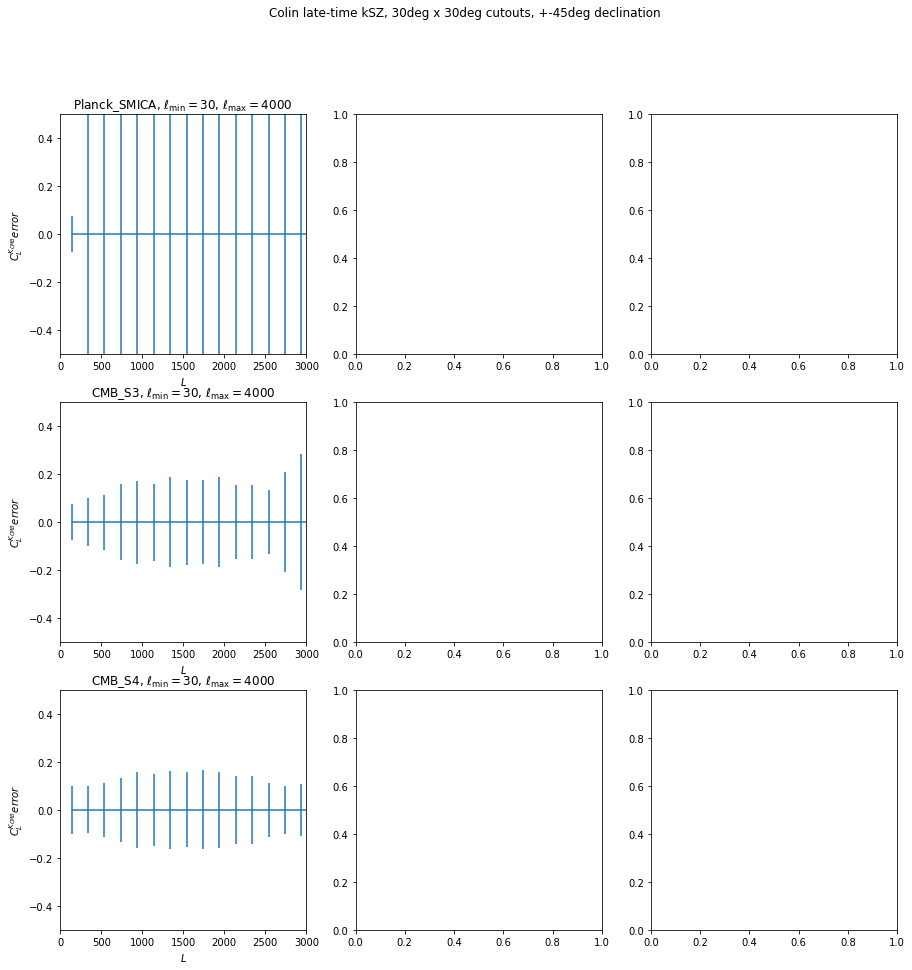

In [22]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('%s %s kSZ, 30deg x 30deg cutouts, +-45deg declination' %(map_source, ksz_name))
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        #ax[i,j].plot(Data['Ls'], Data['bias']*Data['reckap_x_reckap']/(Data['reckap_x_reckap']-Data['noise']))
        ax[i,j].errorbar(Data['Ls'], np.zeros(np.shape(Data['Ls'])), yerr=Data['reckap_x_reckap_err']/(Data['reckap_x_reckap']-Data['noise']))
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$C_L^{K_{CMB}} error$')      
        ax[i,j].set_xlim([0,3000])
        ax[i,j].set_ylim([-0.5,0.5])
        #ax[i,j].set_ylim([-4e-8, 4e-8])
        plt.savefig(plot_path + plot_name)